In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)


In [42]:
# Import Data
data = pd.read_csv('data/data_encod.csv', index_col=[0])
train=data[data.target.notnull()].reset_index(drop=True)
test=data[data.target.isna()].reset_index(drop=True)

print(f'Data: {data.shape}')
print(f'Train: {train.shape}') #(15539, 44)
print(f'Test: {test.shape}')

Data: (20574, 44)
Train: (15539, 44)
Test: (5035, 44)


In [43]:
train.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,2,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
2,0,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,...,0.342484,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833
3,0,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,...,0.336701,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000
4,0,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,...,0.181690,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833


In [44]:
#fillna
train = train.fillna(train.mean())

In [45]:
columns_to_drop = ['target']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (15539, 43)
y: (15539,)
X_train: (10877, 43)
y_train: (10877,)
X_test: (4662, 43)
y_test: (4662,)


## Linear Regression

In [46]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
# Instantiate our model 
lin_reg = LinearRegression()
lin_reg_scaled = LinearRegression()
# Train the model using our data
lin_reg.fit(X_train, y_train)
lin_reg_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

y_pred_train_scaled = lin_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = lin_reg_scaled.predict(X_test_scaled)

In [49]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [50]:
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

rsme_lin_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_lin_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_lin_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_lin_reg_test_scaled:.2f}')

RSME _ train: 38.98
RSME _ test: 39.00
RSME _ train_scaled: 38.98
RSME _ test_scaled: 39.01


In [51]:
print(f' max coef: {max(lin_reg.coef_)}')
print(f' min coef: {min(abs(lin_reg.coef_))}')

 max coef: 1337.5382541420613
 min coef: 2.603792736977084e-10


In [52]:
# error analysis train:
#error_analysis(y_train, y_pred_train)

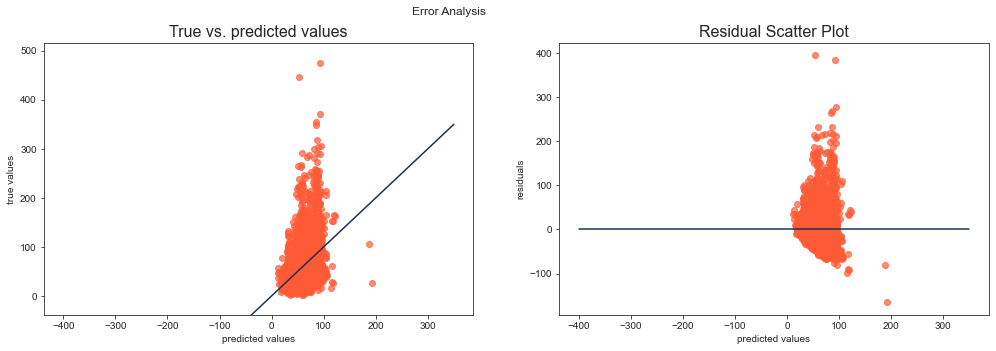

In [53]:
# error analysis test:
error_analysis(y_test, y_pred_test)

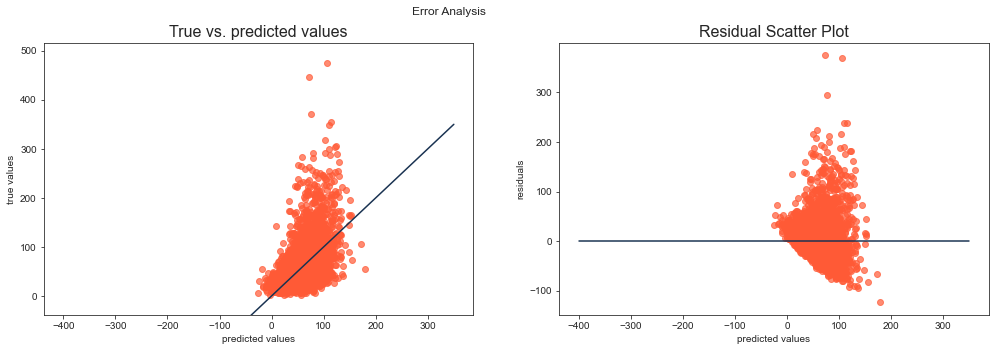

In [13]:
# error analysis test:
#error_analysis(y_test, y_pred_test_scaled)

### Lasso


RSME _ train: 40.21
RSME _ test: 39.96


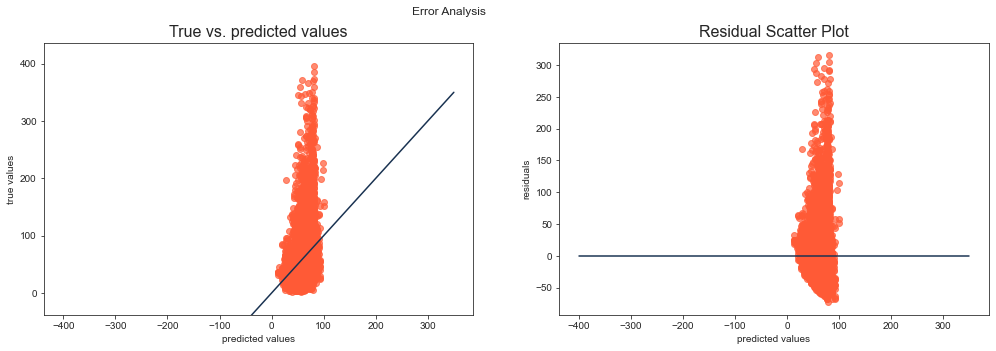

In [54]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)


In [55]:
print(f' max coef: {max(lasso_reg.coef_)}')
print(f' min coef: {min(lasso_reg.coef_)}')

 max coef: 0.5885700405988841
 min coef: -17.079696463054894


### Ridge


RSME _ train: 39.17
RSME _ test: 39.13


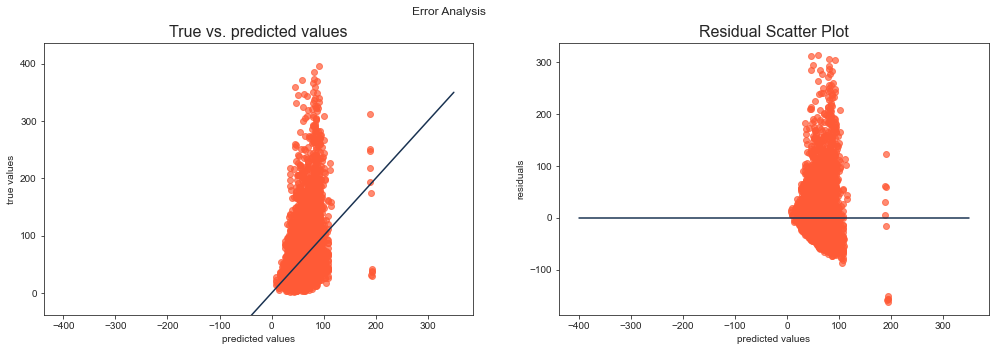

In [56]:
from sklearn.linear_model import Ridge

# Instantiate our model 
ridge_reg = Ridge()

# Train the model using our data
ridge_reg.fit(X_train, y_train)

# predict

y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

rsme_ridge_reg_train = rmse(y_train, y_pred_train)
rsme_ridge_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_ridge_reg_train:.2f}')
print(f'RSME _ test: {rsme_ridge_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

### linear Regression on log y

In [21]:
X_train

,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,mean_precip,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
10928,31.166667,18.316667,23.804804,3.465422,12.009148,23.487500,12.850000,40.261,0.0,0.377908,...,0.622000,195.630470,1.027146,88.200833,23.011402,0.155799,0.786130,195.391908,1.025302,89.151188
2217,29.325000,17.708333,21.851240,2.524489,6.373045,21.258333,11.616667,10.141,0.0,0.227339,...,0.830833,35.082402,2.727500,88.700833,19.325000,0.000000,0.828333,46.246638,2.545000,88.655833
5754,27.533333,16.658333,21.235462,2.936454,8.622764,20.516667,10.875000,13.296,0.0,0.342861,...,0.787561,195.630470,1.027146,89.138075,23.011402,0.155799,0.786130,195.391908,1.025302,89.151188
4903,26.333333,17.875000,21.630716,2.283794,5.215716,21.308333,8.458333,10.323,0.0,0.138711,...,0.998667,301.328235,1.120833,87.892500,18.616667,0.000000,0.999667,292.291282,0.783333,87.997500
7754,28.716667,17.908333,21.313278,3.106161,9.648234,20.100000,10.808333,13.757,0.0,0.287947,...,0.787561,195.630470,1.027146,89.138075,23.011402,0.155799,0.786130,195.391908,1.025302,89.151188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,27.733333,17.133333,21.525000,2.278610,5.192064,21.375000,10.600000,5.649,0.0,0.160017,...,0.939167,170.584629,1.091667,87.975833,21.000000,0.000000,0.946667,170.170718,1.175833,88.005833
8039,30.458333,15.183333,22.263154,3.891025,15.140075,21.025000,15.275000,0.765,0.0,0.025289,...,0.880000,240.473291,0.644167,90.578333,17.275000,0.000000,0.912250,355.573055,0.585833,90.592500
14147,29.550000,18.991667,23.724411,2.580040,6.656607,23.233333,10.558333,9.046,0.0,0.164694,...,0.805250,195.630470,1.027146,88.614167,26.883333,0.000000,0.711000,195.391908,1.025302,88.597500
6936,29.383333,16.700000,21.374656,2.957682,8.747880,20.441667,12.683333,5.411,0.0,0.103306,...,0.922500,315.796040,0.402500,90.650000,19.433333,0.034000,0.925083,289.037299,0.224167,90.608333


In [57]:
y_log = np.log1p(y_train)


In [58]:
y_pred_train

array([72.88442932, 14.77044681, 66.23255492, ..., 35.1635016 ,
       63.08168419, 36.27559634])

RSME _ train: 40.51
RSME _ test: 40.44


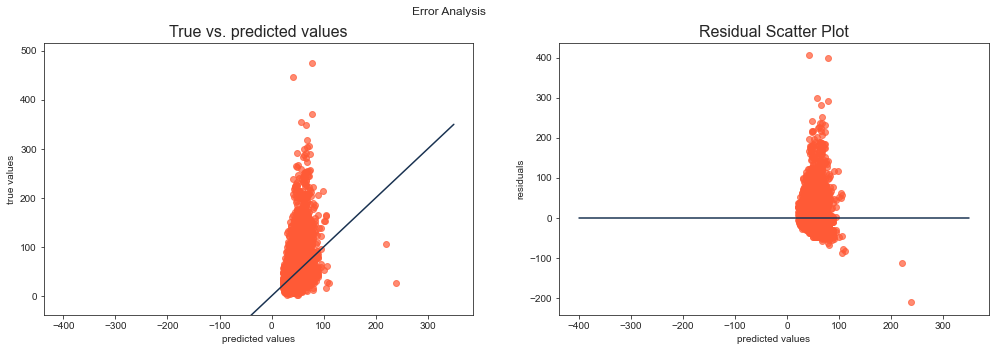

In [59]:
# Instantiate our model 
lin_log_reg = LinearRegression()

# Train the model using our data
lin_log_reg.fit(X_train, y_log) # y´= log(y+1)

# predict

y_pred_train_log = lin_log_reg.predict(X_train) # y = exp(y´) - 1
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test_log = lin_log_reg.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)


rsme_lin_log_reg_train = rmse(y_train, y_pred_train )
rsme_lin_log_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_log_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_log_reg_test:.2f}')

# error analysis test:
error_analysis(y_test, y_pred_test)